# Notebook to compare to merlin

In [1]:
from os import walk
import nibabel as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cleanpath='../../../projects/speech_face_analysis/data/cifti/cleaned/smoothed/'

subject_flist = list(walk(cleanpath))[0][2:][0]

#load the cifti2 to steal the header
img_dir = '/om2/user/jsmentch/projects/speech_face_analysis/data/fitlins_cifti/fitlins/sub-19/'
img_name = 'sub-19_task-MerlinMovie_space-fsLR_contrast-faceAndSpeech_stat-t_statmap.dscalar.nii'
img = nb.load(img_dir+img_name)

#load union of 100% coverage
# union_ind = np.load('data/subject_union_ind.npy') #100% coverage of all sujbects
# data_remove = np.where(union_ind==1, 0, 1) # where there is data set to 0, elsewhere set to 1
# union_ind_ind=np.where(union_ind==1)

### load data for one subject

In [3]:
s_f = subject_flist[0]
sub = s_f[:6]
img = nb.load(cleanpath+str(s_f))
Y = img.get_fdata() #load data from nii
Y = Y[17:] #trim beginning, first 17 TRs
Y = Y[:1009] #trim end to end of film    braintrain.append(s_brain[:-200,:]) #roughly 80 20 split, trim the last 200 TRs of each subject to save as test set
#X = X[:,union_ind_ind[0]]
Y = np.nan_to_num(Y)

In [4]:
Y.shape

(1009, 91282)

In [5]:
tr=1.5
n_scans=1009

In [6]:
x_raw = np.load('../../../data/yamnet_output/merlin_yamnet_scores.npy')

In [7]:
from scipy.signal import resample
X = resample(x_raw, Y.shape[0], axis=0)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [8]:
X.shape

(1009, 521)

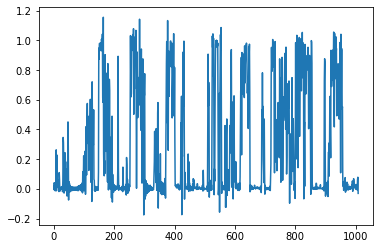

In [9]:
plt.plot(X[:,0])

In [10]:
from analysis import simple_ridgeCV
scores_mean,corr_mean,weights_mean = simple_ridgeCV(X,Y)

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean(0))/v.std(0)
/om2/vast/gablab/jsmentch/projects/nat_img/code/npp.py:12: RuntimeWarning: invalid value encountered in true_divide
  zscore = lambda v: (v-v.mean

Text(0, 0.5, '# voxels')

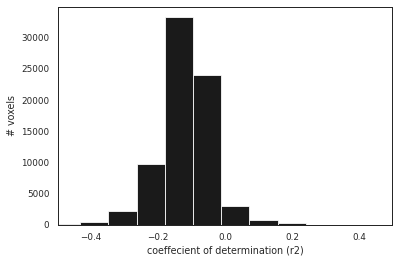

In [14]:
#plt.figure(figsize=(10,5))           
plt.hist(scores_mean,25,color='k')
plt.xlim(-0.5,0.5)
plt.xlabel('coeffecient of determination (r2)')
plt.ylabel('# voxels')

Text(0, 0.5, '# voxels')

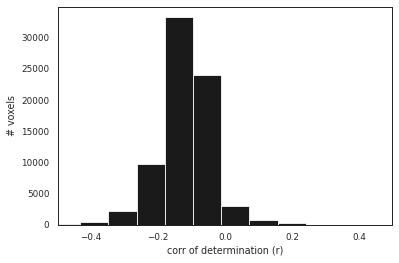

In [109]:
#plt.figure(figsize=(10,5))           
plt.hist(scores_mean,25,color='k')
plt.xlim(-0.5,0.5)
plt.xlabel('corr of determination (r)')
plt.ylabel('# voxels')

In [32]:
plot_32k_results(scores_mean,'r2',subject,feature,'merlin_encoding')

[-1.27620555 -1.2560505  -1.22764082 ...  0.33157008  0.33174205
  2.        ]
[-1.95929125 -1.72557674 -1.58966494 ...  0.46162916  0.46325908
  2.        ]
[-1.27620555 -1.2560505  -1.22764082 ...  0.33157008  0.33174205
  2.        ]
[-1.95929125 -1.72557674 -1.58966494 ...  0.46162916  0.46325908
  2.        ]


In [34]:
plot_32k_results(corr_mean,'r',subject,feature,'merlin_encoding')

[-0.24132409 -0.22983428 -0.22710414 ...         nan         nan
         nan]
[-0.23204213 -0.22651422 -0.21749859 ...         nan         nan
         nan]
[-0.24132409 -0.22983428 -0.2292875  ...         nan         nan
         nan]
[-0.23204213 -0.22651422 -0.21749859 ...         nan         nan
         nan]
